In [21]:
import fastbook

In [24]:
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

dls = mnist.dataloaders(path, 
        device=torch.device('cpu')
    )

simple_cnn = sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,32),           #2x2
    conv(32,2, act=False), #1x1
    Flatten(),
)


In [33]:
learn = Learner(dls, simple_cnn, loss_func=F.cross_entropy, metrics=accuracy, cbs=ActivationStats(with_hist=True))

In [34]:
learn.fit_one_cycle(2, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.063564,0.038966,0.987733,00:13
1,0.022246,0.025635,0.992640,00:12


In [25]:
m = learn.model[0]
m

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
)

In [26]:
m[0].weight.shape

torch.Size([4, 1, 3, 3])

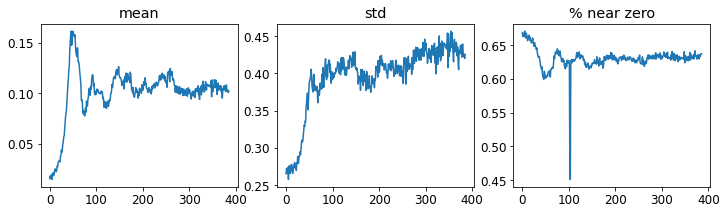

In [35]:
learn.activation_stats.plot_layer_stats(0)

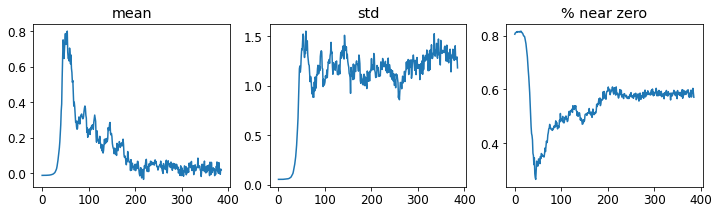

In [47]:
learn.activation_stats.plot_layer_stats(3)

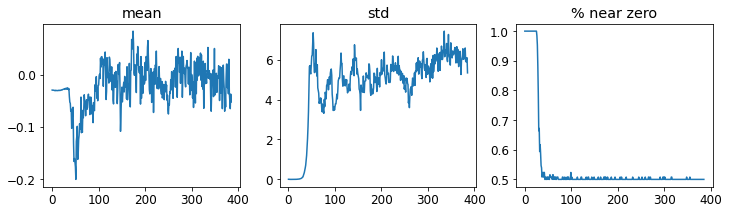

In [46]:
learn.activation_stats.plot_layer_stats(-1)

In [48]:
learn.summary()